# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

### Problem 2 (50 points) 

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
* (5 points) In what conditions will $f(g(x))$ be convex?

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 

# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)


In [5]:
# The objective function
obj = lambda x_2, x_3: (1-2*x_2-3*x_3+1)**2 + (x_2)**2 + (x_3-1)**2
# The gradient with respect to x_2
grad2 = lambda x_2, x_3: -8 + 10*x_2 + 12*x_3
# this is the gradient with respect to x_3
grad3 = lambda x_2, x_3: -14 + 12*x_2 + 20*x_3
# termination criterion
eps = 1e-3
# initial guess for x_2
x0_2 = 0
# initial guess for x_3
x0_3 = 0
# initial guess for x_1
x0_1 = 0
# counter for x_1
k1 = 0
# counter for x_2
k2 = 0
# counter for x_3
k3 = 0
# array to store search steps for x_2
soln_2 = [x0_2]
# array to store search steps for x_3
soln_3 = [x0_3]
# array to stor search steps for x_1
soln_1 = [x0_1]
# start with the initial guess for x_2
x_2 = soln_2[k2]
# start with the initial guess for x_3
x_3 = soln_3[k3]
# start with the initial guess for x_1
x_1 = soln_1[k1]
# computing error
#error = abs(grad(x))
norm2 = lambda x_2,x_3: -1/grad2(x_2,x_3)
norm3 = lambda x_2,x_3: -1/grad3(x_2,x_3)
from math import sqrt
error = sqrt(grad2(x_2,x_3)**2+grad3(x_2,x_3)**2)
#error = []
counter = 1
pts = [1]
x_1_p = [0]
x_2_p = [0]
x_3_p = [0]


def line_search(x_2,x_3):
    a = 1
    phi2 = lambda a, x_2, x_3: obj(x_2,x_3) - a*0.8*grad2(x_2,x_3)**2
    phi3 = lambda a, x_2, x_3: obj(x_2,x_3) - a*0.8*grad3(x_2,x_3)**2
    #phi = lambda a, x: obj(x) - a*0.8*grad(x)**2
    while phi2(a,x_2,x_3)<obj(x_2-a*grad2(x_2,x_3),x_3-a*grad3(x_2,x_3)) and phi3(a,x_2,x_3)<obj(x_2-a*grad2(x_2,x_3),x_3-a*grad3(x_2,x_3)) :
        a = 0.5*a
    return a

while error >= eps:
        a = line_search(x_2,x_3)
        x_2 = x_2 - a*grad2(x_2,x_3)
        x_3 = x_3 - a*grad3(x_2,x_3)
        x_1 = 1-2*x_2-3*x_3
        x_1_l = math.log(abs(x_1),10)
        x_2_l = math.log(abs(x_2),10)
        x_3_l = math.log(abs(x_3),10)
        soln_1.append(x_1)
        soln_2.append(x_2)
        soln_3.append(x_3)
        x_1_p.append(x_1_l)
        x_2_p.append(x_2_l)
        x_3_p.append(x_3_l)
        error = sqrt(grad2(x_2,x_3)**2+grad3(x_2,x_3)**2)
        counter = counter+1
        pts.append(counter)
soln_2

[0,
 0.25,
 0.3359375,
 0.22314453125,
 0.08416748046875,
 0.02147674560546875,
 -0.0036727190017700195,
 -0.031863708049058914,
 -0.07513752533122897,
 -0.09400811203522608,
 -0.1015446165429239,
 -0.1099491842453233,
 -0.12277055969379447,
 -0.1283665037090711,
 -0.13060166485391983,
 -0.13309461272583495,
 -0.13689829193229802,
 -0.13855838549771365,
 -0.13922146666314117,
 -0.13996101997278365,
 -0.14108940748913268,
 -0.1415818859305425,
 -0.14177859364189194,
 -0.14199798737597458,
 -0.1423327315738453,
 -0.14247882881061713,
 -0.14253718355389172,
 -0.14260226826718575]

In [6]:
soln_1

[0,
 -0.53125,
 -1.283203125,
 -1.1663818359375,
 -1.459442138671875,
 -1.1904573440551758,
 -1.1146003156900406,
 -1.1024794885888696,
 -1.1885334562975913,
 -1.1072960920791957,
 -1.0843905790810595,
 -1.080617343019604,
 -1.1061528319691103,
 -1.0820645410133252,
 -1.0752726239146204,
 -1.0741546647758438,
 -1.0817298944894742,
 -1.0745838420722769,
 -1.0725689465701407,
 -1.07223728501909,
 -1.074484531275845,
 -1.0723646046560669,
 -1.0717668717572766,
 -1.0716684820837286,
 -1.0723351436810973,
 -1.0717062523515053,
 -1.0715289306301221,
 -1.0714997426323203]

In [7]:
soln_3

[0,
 0.34375,
 0.537109375,
 0.5733642578125,
 0.763702392578125,
 0.7158346176147461,
 0.7073152512311935,
 0.7220689682289958,
 0.7796028356533498,
 0.7651041053832159,
 0.7624932707223024,
 0.7668385705034169,
 0.7838979837855664,
 0.7795991828104891,
 0.7788253178741533,
 0.7801146300758379,
 0.7851754927846901,
 0.7839002043559014,
 0.7836706266321409,
 0.7840531083215525,
 0.7855544487513701,
 0.7851761255057172,
 0.7851080196803535,
 0.7852214856118925,
 0.7856668689429293,
 0.7855546366575799,
 0.7855344325793019,
 0.7855680930555639]

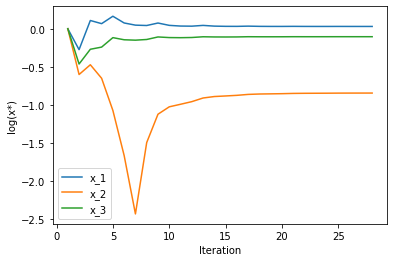

In [8]:
import matplotlib.pyplot as plt
import math
plt.plot(pts, x_1_p, label = 'x_1')
plt.plot(pts, x_2_p, label = 'x_2')
plt.plot(pts, x_3_p, label = 'x_3')
plt.xlabel('Iteration')
plt.ylabel('log(x*)')
plt.legend()

In [10]:
# The objective function
obj = lambda x_2, x_3: (1-2*x_2-3*x_3+1)**2 + (x_2)**2 + (x_3-1)**2
# The gradient with respect to x_2
grad2 = lambda x_2, x_3: -8 + 10*x_2 + 12*x_3
# this is the gradient with respect to x_3
grad3 = lambda x_2, x_3: -14 + 12*x_2 + 20*x_3
# termination criterion
eps = 1e-3
# initial guess for x_2
x0_2 = 0
# initial guess for x_3
x0_3 = 0
# initial guess for x_1
x0_1 = 0
# counter for x_1
k1 = 0
# counter for x_2
k2 = 0
# counter for x_3
k3 = 0
# array to store search steps for x_2
soln_2 = [x0_2]
# array to store search steps for x_3
soln_3 = [x0_3]
# array to stor search steps for x_1
soln_1 = [x0_1]
# start with the initial guess for x_2
x_2 = soln_2[k2]
# start with the initial guess for x_3
x_3 = soln_3[k3]
# start with the initial guess for x_1
x_1 = soln_1[k1]
counter = 1
pts = [1]
x_1_p = [0]
x_2_p = [0]
x_3_p = [0]
# lamb = ((5/14)*grad2(x_2,x_3)**2 - (6/14)*grad2(x_2,x_3)*grad3(x_2,x_3) + (5/28)*(grad3(x_2,x_3)**2))
lamb = (5/14)*grad2(x_2,x_3)**2 - (6/14)*grad2(x_2,x_3)*grad3(x_2,x_3) + (5/28)*(grad3(x_2,x_3)**2)
lamb = lamb/2
dx2 = lambda x_2,x_3: -((5/14)*grad2(x_2,x_3) + (-3/14)*grad3(x_2,x_3))
dx3 = lambda x_2,x_3: -((-3/14)*grad2(x_2,x_3) + (5/28)*grad3(x_2,x_3))
while lamb >= eps:
        x_2 = x_2 + dx2(x_2,x_3)
        x_3 = x_3 + dx3(x_2,x_3)
        x_1 = 1-2*x_2-3*x_3
        x_1_l = math.log(abs(x_1),10)
        x_2_l = math.log(abs(x_2),10)
        x_3_l = math.log(abs(x_3),10)
        soln_2.append(x_2)
        soln_3.append(x_3)
        soln_1.append(x_1)
        x_1_p.append(x_1_l)
        x_2_p.append(x_2_l)
        x_3_p.append(x_3_l)
        lamb = ((5/14)*grad2(x_2,x_3)**2 - (6/14)*grad2(x_2,x_3)*grad3(x_2,x_3) + (5/28)*(grad3(x_2,x_3)**2))
        lamb = lamb/2
        counter = counter+1
        pts.append(counter)


In [11]:
soln_2

[0, -0.1428571428571428]

In [12]:
soln_3

[0, 0.7857142857142865]

In [13]:
soln_1

[0, -1.0714285714285738]

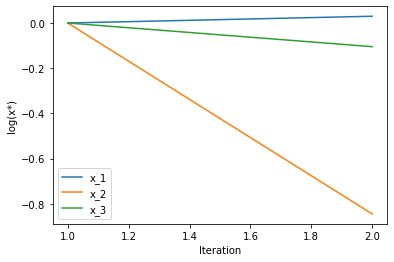

In [14]:
import matplotlib.pyplot as plt
import math
plt.plot(pts, x_1_p, label = 'x_1')
plt.plot(pts, x_2_p, label = 'x_2')
plt.plot(pts, x_3_p, label = 'x_3')
plt.xlabel('Iteration')
plt.ylabel('log(x*)')
plt.legend()

In [15]:
print("For the Gradient Descent method, the initial values chosen were x1 = 0, x2 = 0, and x3 = 0. The corresponding solutions for this were that x1 = -1.0714997, x2 = -0.1426023, x3 = 0.7855681.")

For the Gradient Descent method, the initial values chosen were x1 = 0, x2 = 0, and x3 = 0. The corresponding solutions for this were that x1 = -1.0714997, x2 = -0.1426023, x3 = 0.7855681.


In [16]:
print("For the Newton's method, the initial values chosen were x1 = 0, x2 = 0, and x3 = 0. The corresponding solutions for this were that x1 = -1.0714286, x2 = -0.1428571, x3 = 0.7857143.")

For the Newton's method, the initial values chosen were x1 = 0, x2 = 0, and x3 = 0. The corresponding solutions for this were that x1 = -1.0714286, x2 = -0.1428571, x3 = 0.7857143.


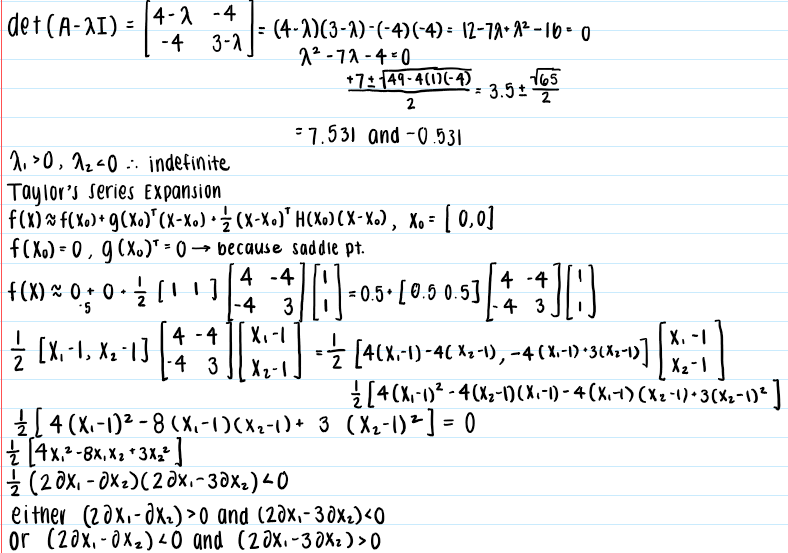

In [24]:
#from PIL import Image
#onea = Image.open('hw2_p1_1.png');
#onea.show();
#[homework](img/hw2_p1_1.png)
from IPython.display import Image
Image('hw2_p1_1.png')


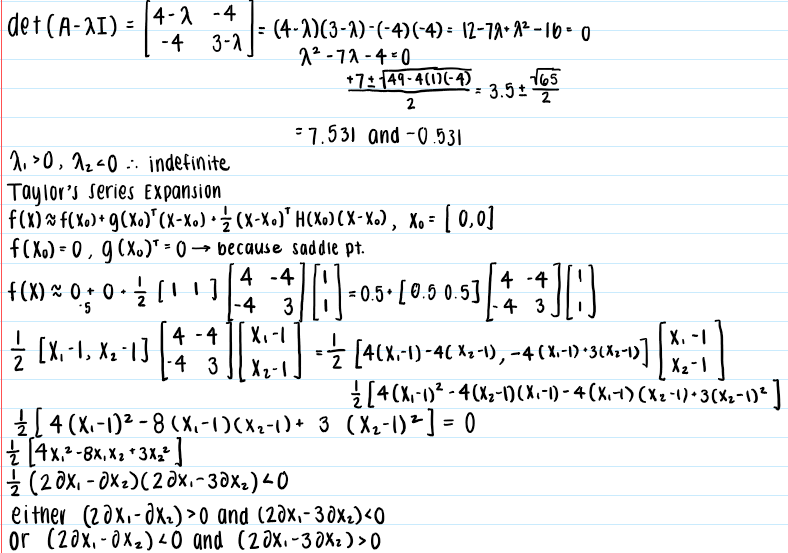

In [25]:
from IPython.display import Image
Image('hw2_p1_2.png')

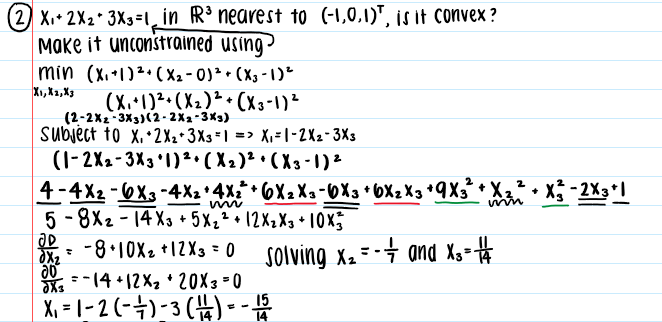

In [26]:
from IPython.display import Image
Image('hw2_p2_1.png')

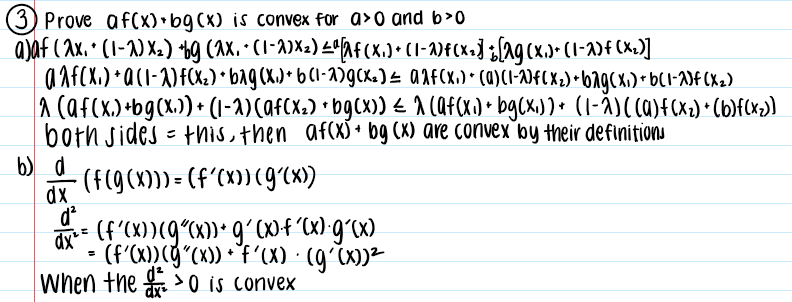

In [27]:
from IPython.display import Image
Image('hw2_p3_1.png')

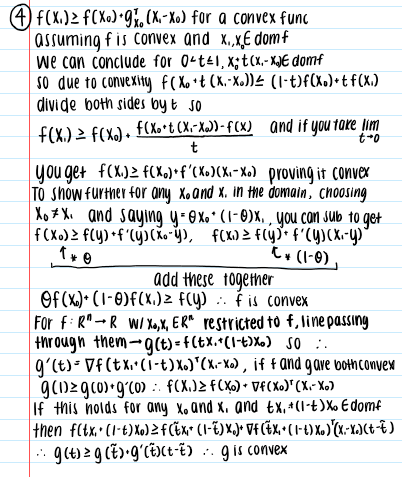

In [28]:
from IPython.display import Image
Image('hw2_p4_1.png')

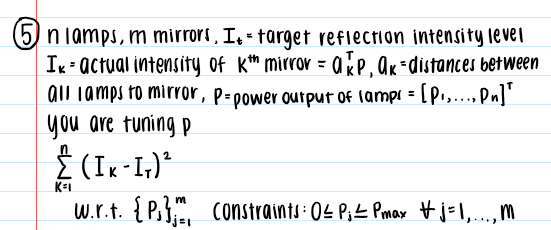

In [29]:
from IPython.display import Image
Image('hw2_p5_1.png')